In [2]:
import pandas as pd
%matplotlib inline  
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('C:/Users/jeony/OneDrive/바탕 화면/3학년 1학기/글로벌 인턴십/Group6/Data/0412 COVID Vaccination in World/vaccinations.csv')

In [4]:
df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [5]:
df.isnull().sum()

location                                    0
iso_code                                    0
date                                        0
total_vaccinations                      90843
people_vaccinated                       93979
people_fully_vaccinated                 96253
total_boosters                         122066
daily_vaccinations_raw                 103830
daily_vaccinations                       1178
total_vaccinations_per_hundred          90843
people_vaccinated_per_hundred           93979
people_fully_vaccinated_per_hundred     96253
total_boosters_per_hundred             122066
daily_vaccinations_per_million           1178
daily_people_vaccinated                  1139
daily_people_vaccinated_per_hundred      1139
dtype: int64

In [6]:
#since the trade data are by months, I grouped the data by months
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df1=df
df1=df1[df1['iso_code'] == 'KOR']
df1['Month'] = df1['date'].dt.month
df1['Year'] = df1['date'].dt.year
df1.head()

C:\Users\jeony\AppData\Local\Temp\ipykernel_25448\560945182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = df1['date'].dt.month
C:\Users\jeony\AppData\Local\Temp\ipykernel_25448\560945182.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = df1['date'].dt.year


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,Month,Year
136744,South Korea,KOR,2021-02-26,50357.0,39189.0,11386.0,2.0,NaN,NaN,0.10,0.08,0.02,0.0,NaN,NaN,NaN,2,2021
136745,South Korea,KOR,2021-02-27,52325.0,40934.0,11607.0,2.0,1968.0,1968.0,0.10,0.08,0.02,0.0,38.0,1745.0,0.003,2,2021
136746,South Korea,KOR,2021-02-28,53465.0,41960.0,11715.0,2.0,1140.0,1554.0,0.10,0.08,0.02,0.0,30.0,1386.0,0.003,2,2021
136747,South Korea,KOR,2021-03-01,55673.0,43891.0,11985.0,2.0,2208.0,1772.0,0.11,0.08,0.02,0.0,34.0,1567.0,0.003,3,2021
136748,South Korea,KOR,2021-03-02,122214.0,108806.0,12296.0,3.0,66541.0,17964.0,0.24,0.21,0.02,0.0,347.0,17404.0,0.034,3,2021


In [7]:
df1.groupby(['location','Year',"Month"])['daily_vaccinations'].aggregate(['sum']).reset_index()

,location,Year,Month,sum
0,South Korea,2021,2,3522.0
1,South Korea,2021,3,855024.0
2,South Korea,2021,4,2069754.0
3,South Korea,2021,5,4252159.0
4,South Korea,2021,6,11946190.0
5,South Korea,2021,7,5387216.0
6,South Korea,2021,8,17622029.0
7,South Korea,2021,9,19438499.0
8,South Korea,2021,10,15993319.0
9,South Korea,2021,11,7391403.0


In [8]:
#calculate the total vaccinations by month
df2=df1
df2=df2.groupby(['Year',"Month"])['daily_vaccinations'].aggregate(['sum']).reset_index()
df2.head()

,Year,Month,sum
0,2021,2,3522.0
1,2021,3,855024.0
2,2021,4,2069754.0
3,2021,5,4252159.0
4,2021,6,11946190.0


In [9]:
df3 = pd.read_csv('C:/Users/jeony/OneDrive/바탕 화면/3학년 1학기/글로벌 인턴십/Group6/Data/Trade data/WordTradeData202012.csv')
df3.head()

,period,Number of Export,Export Value,Number of Import,Import Value,Trade Balance
0,Dec-20,1275069,51332449,3274735,44638246,6694203
1,Jan-21,1063782,48006974,3216535,44456822,3550152
2,Feb-21,991831,44706907,2779591,42404636,2302271
3,Mar-21,1439462,53690914,3298165,49742555,3948359
4,Apr-21,1184249,51225991,3346730,50891152,334840


In [10]:
df3.dtypes

period              object
Number of Export     int64
Export Value         int64
Number of Import     int64
Import Value         int64
Trade Balance        int64
dtype: object

In [12]:
df4 = pd.concat([df2,df3],axis=1)
df4.drop(df4.index[23:], inplace=True)
df4.rename(columns={'sum':'Vaccinations'},inplace=True)
df4

,Year,Month,Vaccinations,period,Number of Export,Export Value,Number of Import,Import Value,Trade Balance
0,2021,2,3522.0,Dec-20,1275069,51332449,3274735,44638246,6694203
1,2021,3,855024.0,Jan-21,1063782,48006974,3216535,44456822,3550152
2,2021,4,2069754.0,Feb-21,991831,44706907,2779591,42404636,2302271
3,2021,5,4252159.0,Mar-21,1439462,53690914,3298165,49742555,3948359
4,2021,6,11946190.0,Apr-21,1184249,51225991,3346730,50891152,334840
5,2021,7,5387216.0,May-21,1143835,50725161,3245257,47910522,2814640
6,2021,8,17622029.0,Jun-21,1513595,54778905,3101662,50429027,4349878
7,2021,9,19438499.0,Jul-21,1182251,55461518,3225209,53676256,1785262
8,2021,10,15993319.0,Aug-21,1122015,53165104,3180345,51581093,1584011
9,2021,11,7391403.0,Sep-21,1502399,55913862,3199940,51636341,4277521


In [13]:
df5=df4
df5.drop(labels=['Year','Month'],axis=1,inplace=True)
df5

,Vaccinations,period,Number of Export,Export Value,Number of Import,Import Value,Trade Balance
0,3522.0,Dec-20,1275069,51332449,3274735,44638246,6694203
1,855024.0,Jan-21,1063782,48006974,3216535,44456822,3550152
2,2069754.0,Feb-21,991831,44706907,2779591,42404636,2302271
3,4252159.0,Mar-21,1439462,53690914,3298165,49742555,3948359
4,11946190.0,Apr-21,1184249,51225991,3346730,50891152,334840
5,5387216.0,May-21,1143835,50725161,3245257,47910522,2814640
6,17622029.0,Jun-21,1513595,54778905,3101662,50429027,4349878
7,19438499.0,Jul-21,1182251,55461518,3225209,53676256,1785262
8,15993319.0,Aug-21,1122015,53165104,3180345,51581093,1584011
9,7391403.0,Sep-21,1502399,55913862,3199940,51636341,4277521


Text(0.5, 1.0, 'Correlation between number of vaccinations and trade indicators')

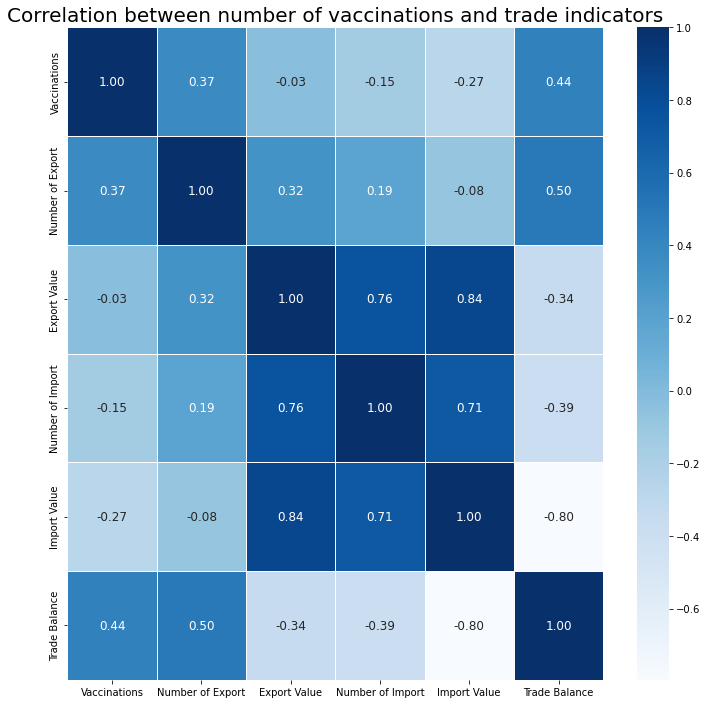

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(data = df5.corr(), annot=True, fmt = '.2f',annot_kws = {'size' : 12},linewidth=.5,cmap='Blues')
plt.title('Correlation between number of vaccinations and trade indicators', fontsize=20)

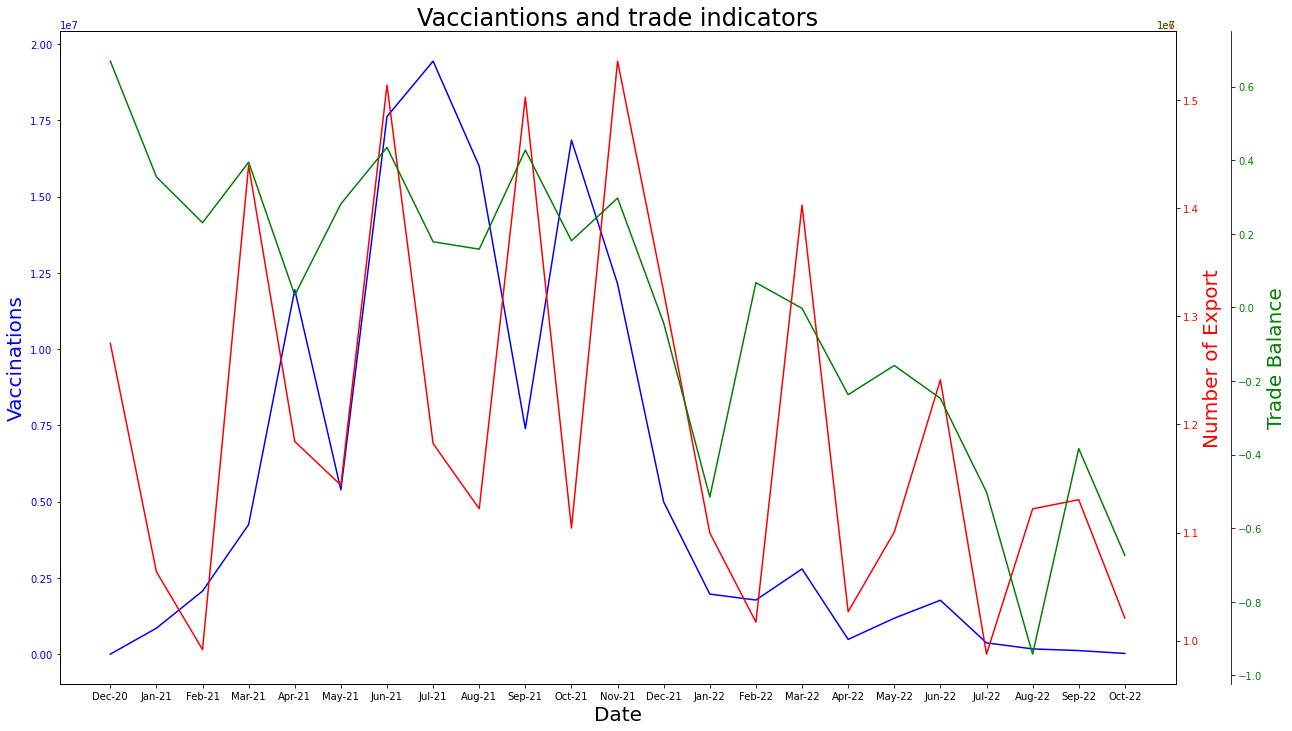

In [15]:
fig = plt.figure(figsize=(20,12)) ## 캔버스 생성
ax1 = fig.add_subplot(1,1,1) ## axes 생성

color1='blue'
ax1.plot(df5['period'],df5['Vaccinations'], label='Vaccinations', color=color1)
ax1.set_xlabel('Date', fontsize=20)
ax1.set_ylabel('Vaccinations', color=color1, fontsize=20)
ax1.tick_params(axis='y', labelcolor=color1)
 
ax2 = ax1.twinx()
color2='red'
ax2.plot(df5['period'],df5['Number of Export'], label='Number of Export', color=color2)
ax2.set_ylabel('Number of Export', color=color2, fontsize=20)
ax2.tick_params(axis='y', labelcolor=color2)

ax3 = ax1.twinx()
color3='green'
ax3.plot(df5['period'],df5['Trade Balance'], label='Trade Balance', color=color3)
ax3.set_ylabel('Trade Balance', color=color3, fontsize=20)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.spines.right.set_position(("axes", 1.05))

ax1.set_title('Vacciantions and trade indicators', fontsize=24) 

plt.show()